Wine Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

There are 3 varieties:
- 0 (variety A)
- 1 (variety B)
- 2 (variety C)

The model must have a Recall metric of over 0.95

Explore the data

In [3]:
import pandas as pd

data = pd.read_csv('wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,1
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520,1
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600,2
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312,1
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,1
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,0
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,1
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,1


In [7]:
data[data.isnull().any(axis=1)]

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety


In [12]:
features = [i for i in data.columns[0:-1]]
label = [data.columns[-1]]
X, y = data[features].values, data[label].values

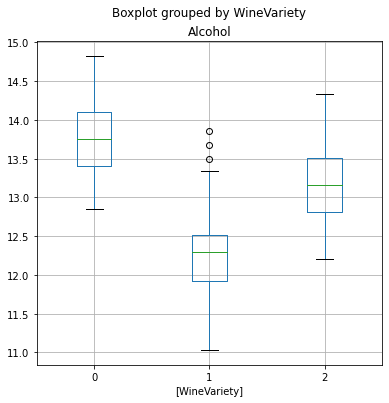

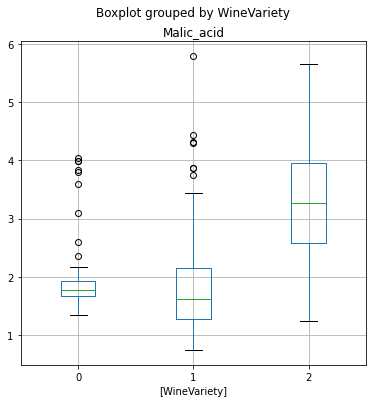

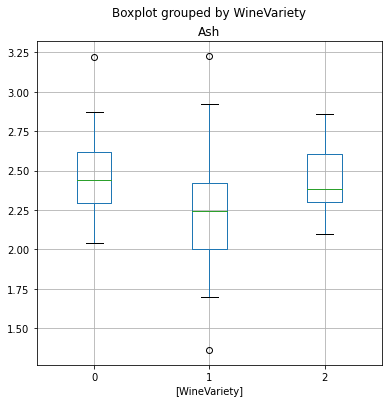

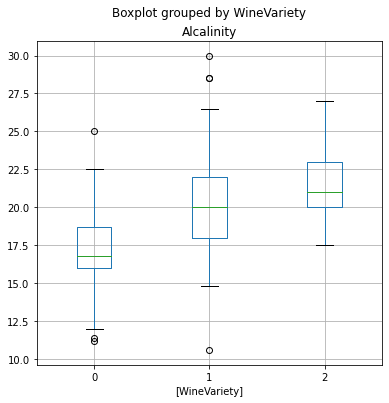

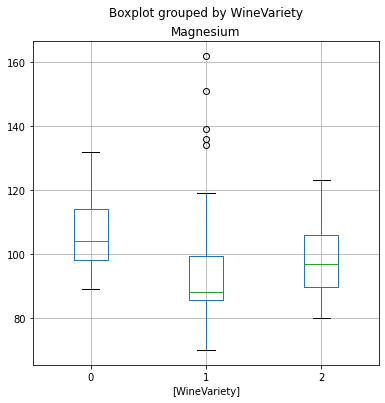

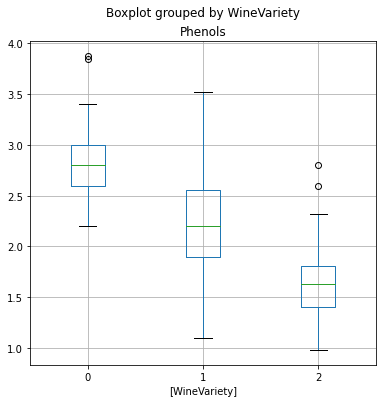

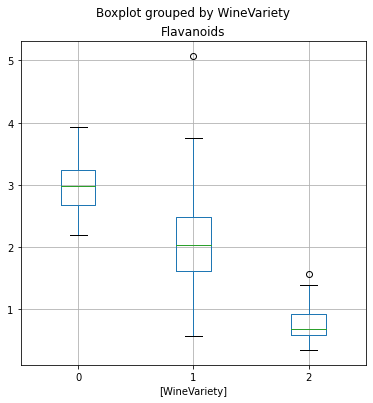

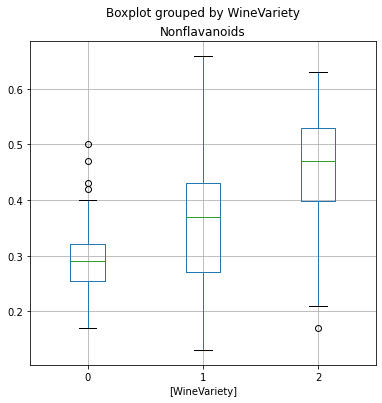

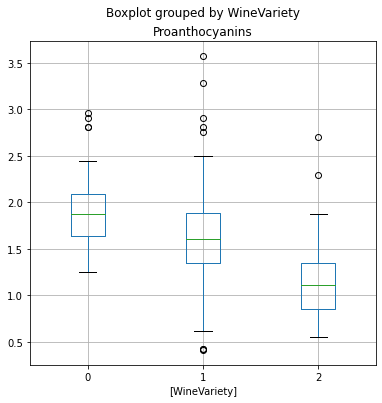

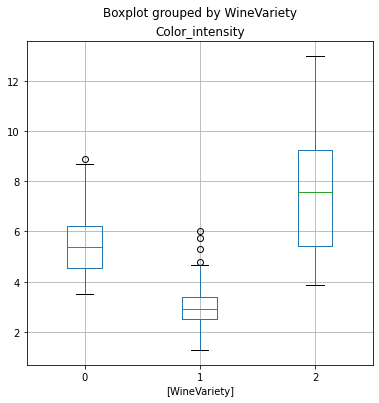

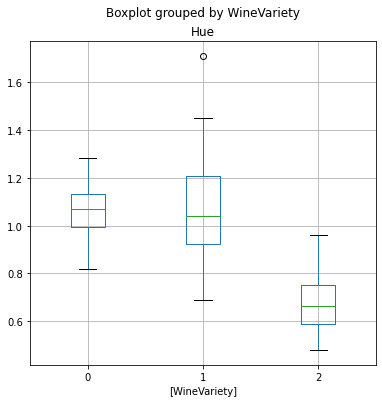

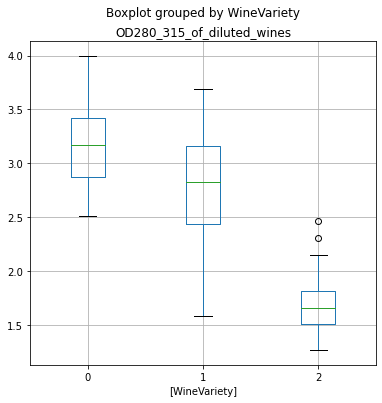

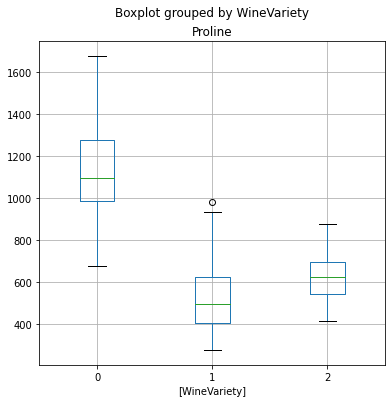

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
for col in features:
    data.boxplot(column=col, by=label, figsize=(6, 6))
plt.show()

Prepare the data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


Train and evaluate a LogisticRegression model

In [43]:
from sklearn.linear_model import LogisticRegression
reg = 0.1
model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
predictions = model.predict(X_test)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]


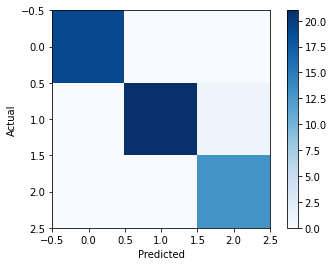

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

def evaluations(predicted_values, actual_values):
    print(classification_report(actual_values, predicted_values))
    cm = confusion_matrix(actual_values, predicted_values)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluations(predictions, y_test)

Train and evaluate a RandomForestClassifier model

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_10400/27523311.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]


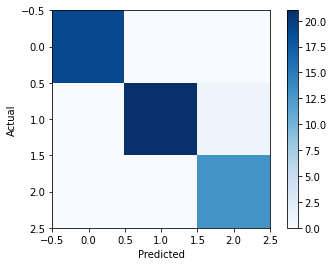

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
predictions = model.predict(X_test)
evaluations(predictions, y_test)

Predicting labels with new feature values

Saving the model

In [55]:
import joblib

filename = 'Wine_Classifier_RandomForest'
joblib.dump(model, filename)

['Wine_Classifier_RandomForest']

Predicting new labels with new values

In [56]:
loaded_model = joblib.load(filename)

X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

predictions = loaded_model.predict(X_new)

print('Predictions')
for prediction in predictions:
    print(prediction)

Predictions
0
1
